In [8]:
import pandas as pd
import numpy as np
import seaborn as sea
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn import preprocessing
import sklearn as skl

In [9]:
df = pd.read_csv("Pricing_Engineered.csv")
df.head()

,maker_key,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,...,feature_5,feature_6,feature_7,feature_8,price,sold_at,AgeAtSale,TotalFeatures,ModelType,Unnamed: 21
0,BMW,118,140411,100,2/1/2012,diesel,black,convertible,True,True,...,True,True,True,False,11300,1/1/2018,5.92,5,1,0.0
1,BMW,M4,13929,317,4/1/2016,petrol,grey,convertible,True,True,...,False,True,True,True,69700,2/1/2018,1.84,5,M,NaN
2,BMW,320,183297,120,4/1/2012,diesel,white,convertible,False,False,...,True,False,True,False,10200,2/1/2018,5.84,2,3,NaN
3,BMW,420,128035,135,7/1/2014,diesel,red,convertible,True,True,...,True,True,True,True,25100,2/1/2018,3.59,6,4,NaN
4,BMW,425,97097,160,12/1/2014,diesel,silver,convertible,True,True,...,False,True,True,True,33400,4/1/2018,3.33,5,4,NaN


In [10]:
dfcopy = df.copy()
dfcopy["Age_Std"] = (dfcopy["AgeAtSale"]-dfcopy["AgeAtSale"].mean())/(dfcopy['AgeAtSale'].std())
dfcopy['engine_std'] = (dfcopy['engine_power']-np.mean(dfcopy['engine_power']))/(np.std(dfcopy['engine_power']))
dfcopy['Feat_std'] = (dfcopy['TotalFeatures']-np.mean(dfcopy['TotalFeatures']))/(np.std(dfcopy['TotalFeatures']))
dfcopy['mile_std'] = (dfcopy['mileage']-np.mean(dfcopy['mileage']))/(np.std(dfcopy['mileage']))
dfcopy.drop(columns=['maker_key','model_key','registration_date','sold_at','ModelType','Unnamed: 21','mileage','engine_power','TotalFeatures','AgeAtSale'], inplace=True)

In [11]:
dfcopy['feature_1'] = dfcopy['feature_1'].map({False: 0, True: 1})
dfcopy['feature_2'] = dfcopy['feature_2'].map({False: 0, True: 1})
dfcopy['feature_3'] = dfcopy['feature_3'].map({False: 0, True: 1})
dfcopy['feature_4'] = dfcopy['feature_4'].map({False: 0, True: 1})
dfcopy['feature_5'] = dfcopy['feature_5'].map({False: 0, True: 1})
dfcopy['feature_6'] = dfcopy['feature_6'].map({False: 0, True: 1})
dfcopy['feature_7'] = dfcopy['feature_7'].map({False: 0, True: 1})
dfcopy['feature_8'] = dfcopy['feature_8'].map({False: 0, True: 1})
dfcopy.fillna(-1, inplace=True)
datafile = pd.get_dummies(dfcopy, columns = ['fuel', 'paint_color','car_type'])

In [12]:
datafile.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,price,Age_Std,...,paint_color_silver,paint_color_white,car_type_convertible,car_type_coupe,car_type_estate,car_type_hatchback,car_type_sedan,car_type_subcompact,car_type_suv,car_type_van
0,1,1,0,0,1,1,1,0,11300,0.190981,...,0,0,1,0,0,0,0,0,0,0
1,1,1,0,0,0,1,1,1,69700,-1.414941,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,1,0,10200,0.159492,...,0,1,1,0,0,0,0,0,0,0
3,1,1,0,0,1,1,1,1,25100,-0.726127,...,0,0,1,0,0,0,0,0,0,0
4,1,1,0,0,0,1,1,1,33400,-0.828465,...,1,0,1,0,0,0,0,0,0,0


In [13]:
dfcopy.head()
X = datafile.drop(columns='price')
y = datafile['price']

In [14]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
data_score = []

In [15]:
gb = GradientBoostingRegressor(min_samples_leaf= 15, min_samples_split=2, learning_rate=0.1, max_depth=4, n_estimators=100)
gb.fit(X_train,y_train)
y_gb = gb.predict(X)
print(gb.score(X_test,y_test))
data_score.append(gb.score(X_test,y_test))

0.8231198012871475


In [16]:
rf = RandomForestRegressor(n_estimators=50, random_state = 42) 
rf.fit(X_train,y_train) 
print(rf.score(X_test,y_test))
data_score.append(rf.score(X_test,y_test))

0.8049775392928022


In [17]:
DT = DecisionTreeRegressor()
DT.fit(X_train,y_train)
print(DT.score(X_test,y_test))
data_score.append(DT.score(X_test,y_test))

0.6544391732749137


Feature: feature_1, Score: 0.02084
Feature: feature_2, Score: 0.00959
Feature: feature_3, Score: 0.01011
Feature: feature_4, Score: 0.00534
Feature: feature_5, Score: 0.00750
Feature: feature_6, Score: 0.00295
Feature: feature_7, Score: 0.00732
Feature: feature_8, Score: 0.01072
Feature: Age_Std, Score: 0.21344
Feature: engine_std, Score: 0.41229
Feature: Feat_std, Score: 0.05756
Feature: mile_std, Score: 0.15391
Feature: fuel_diesel, Score: 0.00141
Feature: fuel_electro, Score: 0.00014
Feature: fuel_hybrid_petrol, Score: 0.00009
Feature: fuel_petrol, Score: 0.00127
Feature: paint_color_beige, Score: 0.00048
Feature: paint_color_black, Score: 0.00374
Feature: paint_color_blue, Score: 0.01529
Feature: paint_color_brown, Score: 0.00132
Feature: paint_color_green, Score: 0.00007
Feature: paint_color_grey, Score: 0.00342
Feature: paint_color_orange, Score: 0.00002
Feature: paint_color_red, Score: 0.00039
Feature: paint_color_silver, Score: 0.00193
Feature: paint_color_white, Score: 0.00260

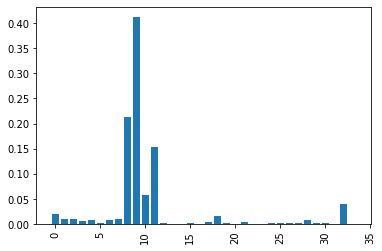

In [20]:
importance = rf.feature_importances_

for i,v in enumerate(importance):
    print('Feature: %s, Score: %.5f' % (X.columns[i],v))
plt.bar([x for x in range(len(importance))], importance)
plt.show()